In [149]:
import pandas as pd
import seaborn as sns
import numpy as np
from StringIO import StringIO

In [150]:
# Helper function for writing pandas data to a file
def write_to_file(data, f):
    output = StringIO()
    data.to_csv(output, sep='\t', header=False)
    f.write(output.getvalue())
    output.close()

In [151]:
##########
# 4.a
##########

# Instructions: 
# Using pandas, load the data as dataframes and find the number 
# of unique movies and number of unique users in the dataset.

# Open the output file.
f = open('movies.txt', 'w')

# Write a header line.
f.write("---4.a---\n")

# Load the data files.

## Load users.
user_headers = ['user id', 'age', 'gender', 'occupation', 'zip code']
users = pd.read_csv('data/u.user', sep='|', names=user_headers)

## Load movies.
movie_headers = ['movie id', 'movie title']
movies = pd.read_csv('data/u.item', sep='|', names=movie_headers, usecols=range(2))

## Load movie ratings.
data_headers = ['user id', 'movie id', 'rating', 'timestamp']
data = pd.read_csv('data/u.data', sep='\t', names=data_headers)

# Write the number of unique movies (1682).
# This can be done equivalently by len(movies.index).
unique_movies = len(pd.unique(data['movie id']))
f.write(str(unique_movies) + "\n")

# Write the number of unique users (943).
# This can be done equivalently by len(users.index).
unique_users = len(pd.unique(data['user id']))
f.write(str(unique_users) + "\n")

In [152]:
##########
# 4.b
##########

# Instructions: 
# Using pandas, find the top 5 movies with the most number of 
# ratings. Sort the output from most ratings to least ratings.

f.write("---4.b---\n")

# Merge the data by common key.
ratings_with_movies = pd.merge(movies, data)
combined = pd.merge(ratings_with_movies, users)

# Find the top 5 movies by number of ratings.
top_5_by_rating = combined['movie title'].value_counts()[:5]

# Write.
write_to_file(top_5_by_rating, f)

In [153]:
##########
# 4.c
##########

# Instructions:
# Find the top 5 movies with the lowest average age of the
# people that rated the movies. Consider only the movies that 
# have got at least 100 ratings.

f.write("---4.c---\n")

# Find the average age, and number of ratings per movie.
with_average_age = combined.groupby('movie title').agg({'age': [np.mean], 'rating': [np.size]})

# Exclude movies with < 100 ratings.
with_100_or_more = with_average_age[with_average_age[('rating', 'size')] >= 100]

# Sorted by age, and retrieve the movies with the 5 smallest average ages.
sorted_by_age = with_100_or_more.sort_values(('age', 'mean'), ascending=True).head(5)

# Write.
write_to_file(sorted_by_age, f)

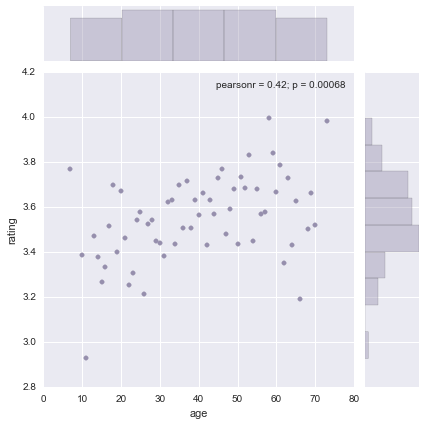

In [154]:
##########
# 4.d
##########

# Instructions:
# Draw a scatterplot with marginal histograms to visualize 
# how the average rating varies with age. Save this plot as 
# scatterhist.png.

import matplotlib.pyplot as plt

f.write("---4.d---\n")

# Group by age, and determine the mean rating.
grouped_by_age = combined.groupby('age').agg({'rating': np.mean}) 

# Make the age index a column.
grouped_by_age.reset_index(inplace=True) 

# Determine average rating by page
sns.jointplot(x='age', y='rating', data=grouped_by_age, color='#968fad')
sns.plt.show()

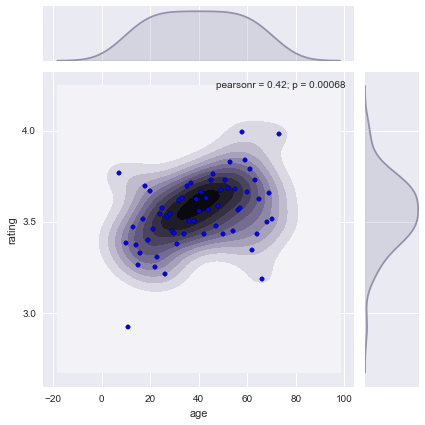

In [155]:
##########
# 4.e
##########

# Instructions:
# Augment the scatterplot with density estimates.
# Please note that you will be awarded points for 
# this section only if the graph has both the density
# estimates and the scatterplot on the same graph. 
# Save this plot as scatterbonus.png.

f.write("---4.e---\n")

# Plot the density estimates with the scatter plot.
sns.jointplot(x='age', y='rating', data=grouped_by_age, color='#968fad', kind='kde').plot_joint(plt.scatter)
sns.plt.show()

In [156]:
f.close()